In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("C:/Users/user/Downloads/Algerian_forest_fires_cleaned_dataset.csv")


In [39]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [40]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [41]:
list(df.columns)

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

In [42]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [43]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [30]:
from sklearn.preprocessing  import LabelEncoder

In [44]:
LE = LabelEncoder()

In [45]:
df['Classes']=LE.fit_transform(df['Classes'])

In [46]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,5,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,5,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,5,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,5,0


In [47]:
df.Classes.value_counts()

Classes
2    131
5    101
0      4
1      2
3      2
4      1
7      1
6      1
Name: count, dtype: int64

In [48]:
df.Classes=df.Classes.replace(1,0)
df.Classes=df.Classes.replace(2,0)
df.Classes=df.Classes.replace(5,1)
df.Classes=df.Classes.replace(3,1)
df.Classes=df.Classes.replace(4,1)
df.Classes=df.Classes.replace(7,1)
df.Classes=df.Classes.replace(6,1)

In [49]:
df.Classes.value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

In [50]:
X=df.drop('FWI',axis=1)
y=df['FWI']

<Axes: >

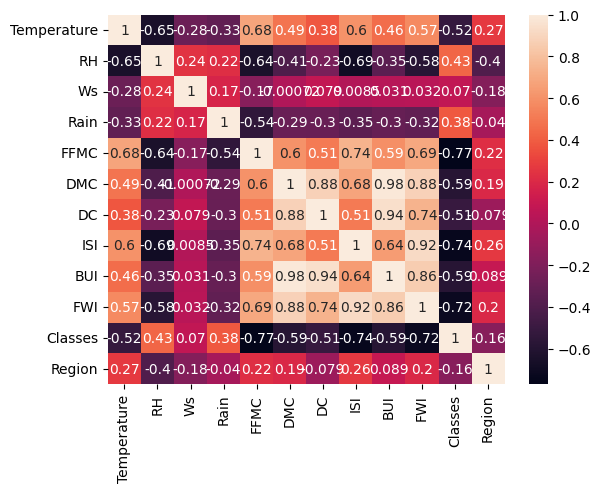

In [51]:
corr = df.corr()
sns.heatmap(corr ,  annot = True)

In [52]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,1,0


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=42)

In [55]:
X_train.shape,X_test.shape

((187, 11), (56, 11))

<Axes: >

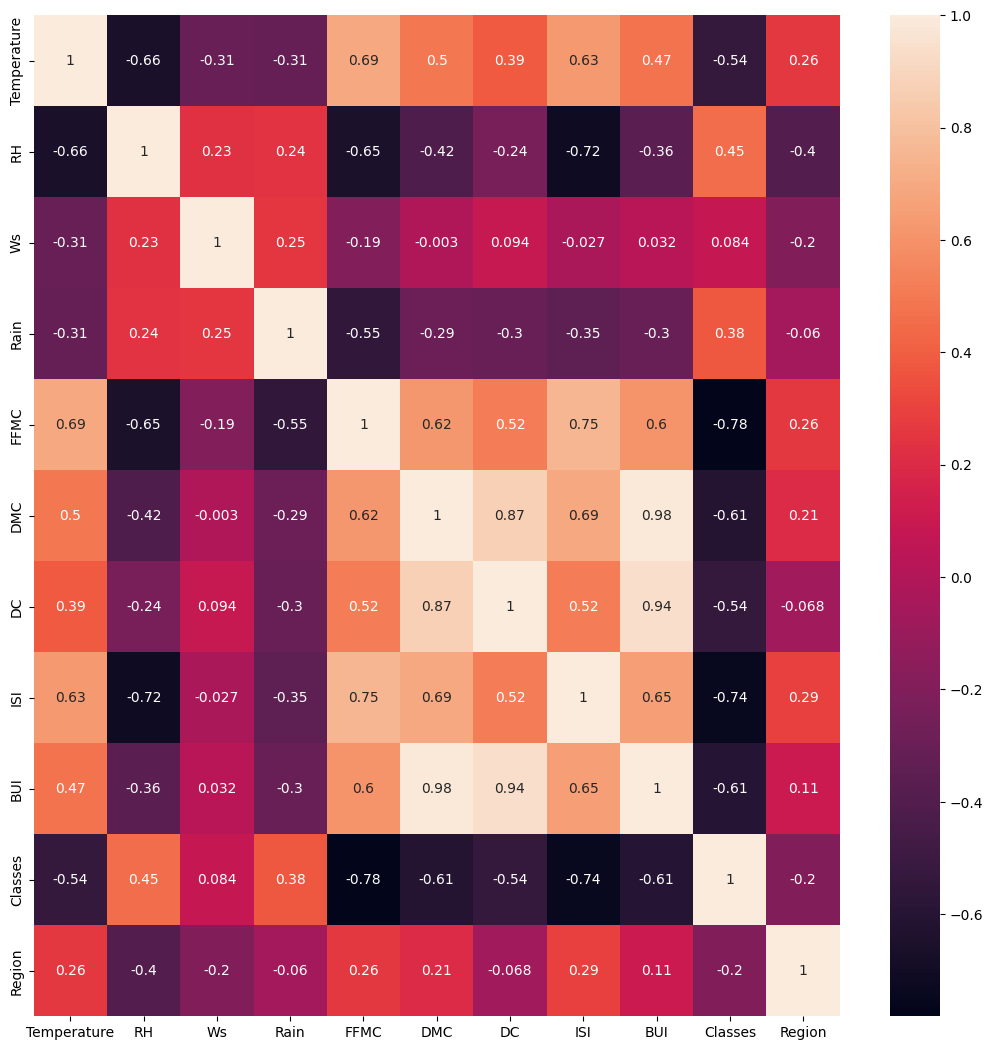

In [59]:
plt.figure(figsize=(13,13))
sns.heatmap(X_train.corr(), annot = True)

In [65]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [66]:
corr_features = correlation(X_train, 0.85)

In [67]:
corr_features

{'BUI', 'DC'}

In [68]:
X_train.drop(corr_features,axis = 1, inplace = True)
X_test.drop(corr_features,axis= 1,inplace=True)
X_train.shape,X_test.shape

((187, 9), (56, 9))

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [70]:
X_train_scaled

array([[ 0.50352142, -0.40605429, -0.21511787, ..., -0.75409762,
         1.11938021,  0.98408386],
       [ 0.23059821, -0.33921261,  0.16799681, ...,  0.43699695,
        -0.89335151,  0.98408386],
       [-0.31524819,  0.66341265, -0.59823255, ..., -0.24029212,
        -0.89335151,  0.98408386],
       ...,
       [-1.95278741,  0.93077938,  0.5511115 , ..., -1.08106476,
         1.11938021, -1.01617356],
       [ 0.50352142, -0.20552924,  0.16799681, ...,  0.60048052,
        -0.89335151,  0.98408386],
       [-0.58817139,  0.99762106,  2.08357023, ..., -0.8708716 ,
         1.11938021, -1.01617356]], shape=(187, 9))

Text(0.5, 1.0, 'X_train after scaling')

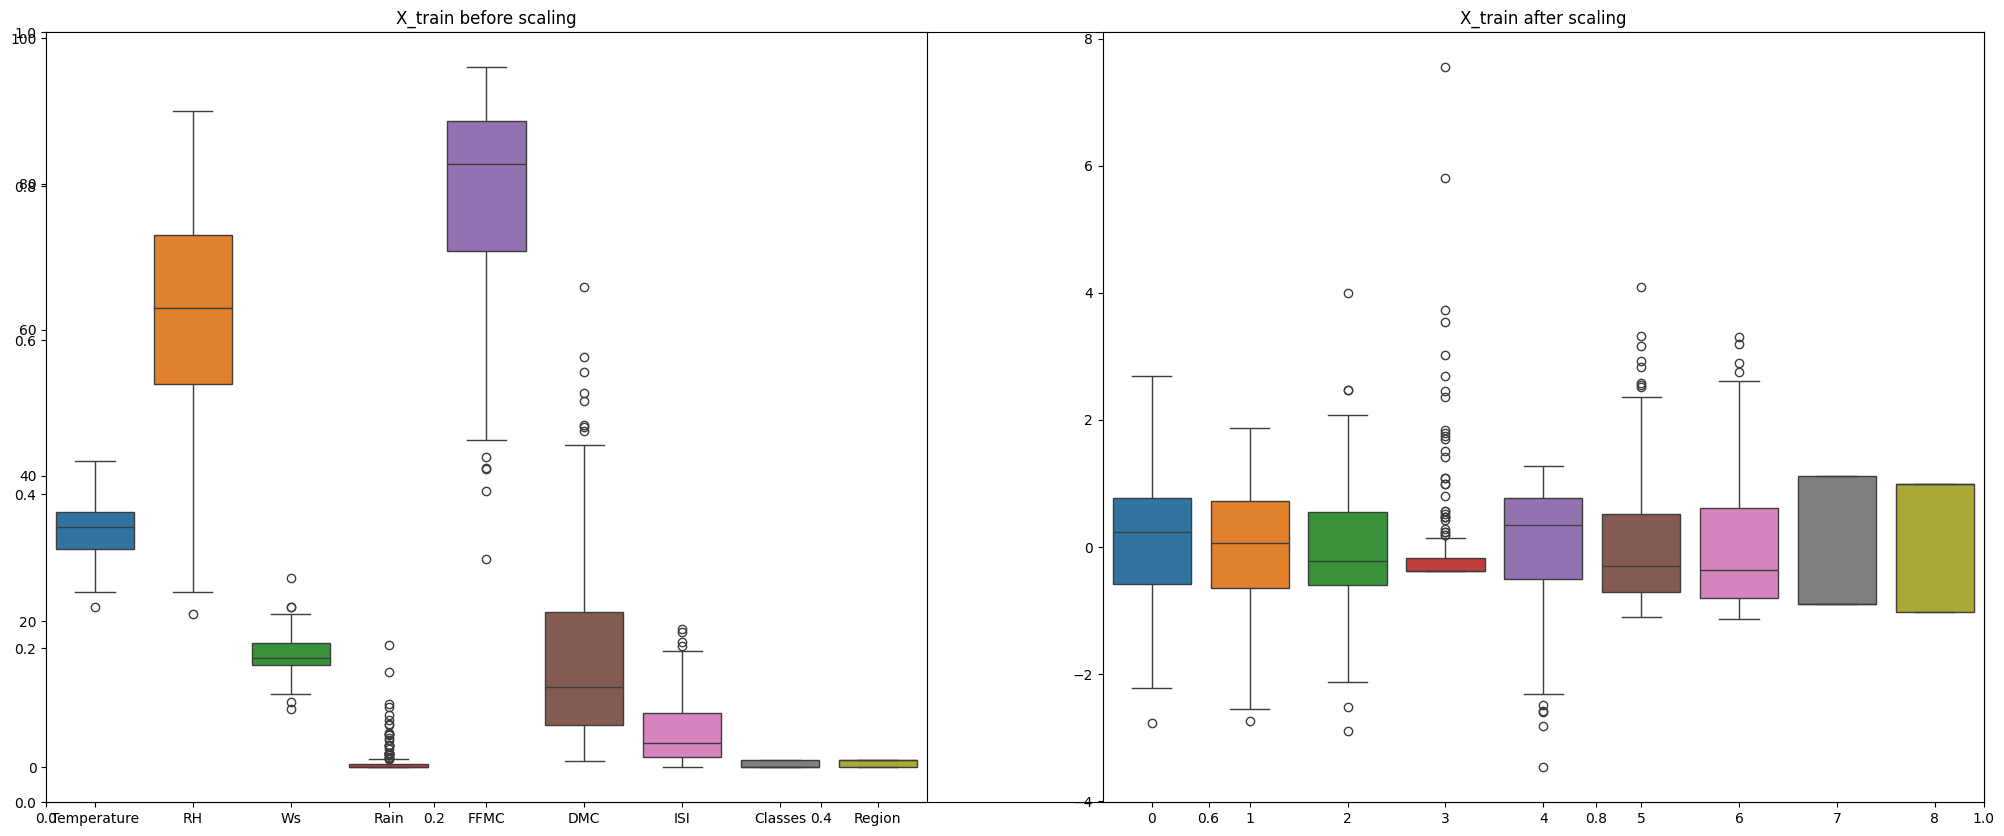

In [74]:
plt.subplots(figsize=(25,10))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after scaling")

Mean_absolute_error 0.575969991579764
R2 Score 0.9841721098920353


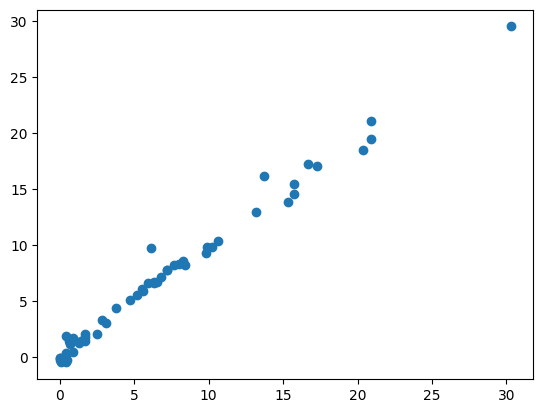

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean_absolute_error", mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.1464136719261415
R2 score 0.9492168835940586


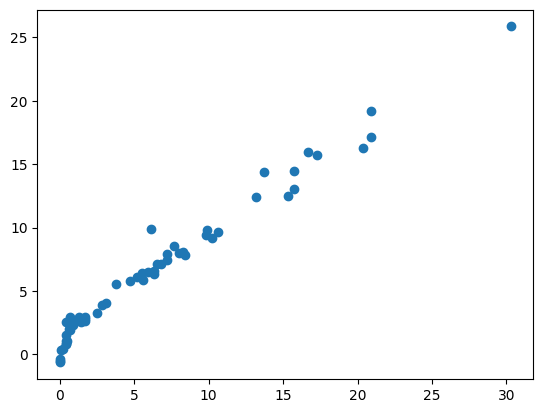

In [75]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 score", score)
plt.scatter(y_test, y_pred)

Mean absolute error 0.5962439517488171
R2 score 0.9836708521814715


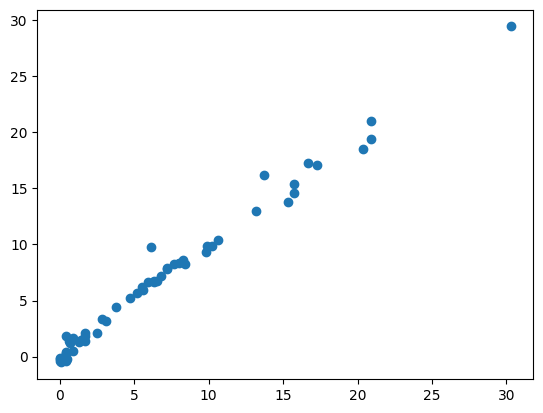

In [78]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 score", score)
plt.scatter(y_test, y_pred)

Mean absolute error 0.906902578934372
R2 score 0.9713370272842186


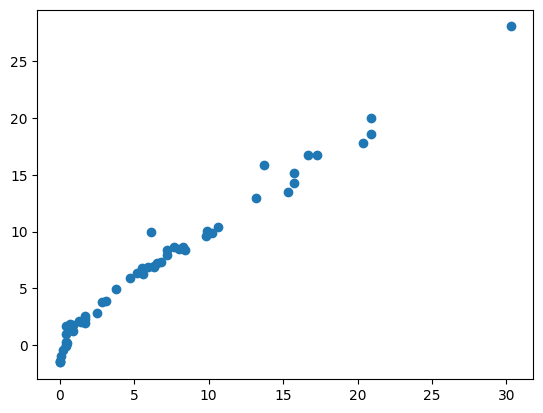

In [83]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ElasticNet=ElasticNet(alpha = 0.12)
ElasticNet.fit(X_train_scaled,y_train)
y_pred=ElasticNet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 score", score)
plt.scatter(y_test, y_pred)